In [1]:
from bbtnn import tnn
import scanpy as sc

In [8]:
adata = sc.read("/Users/lsimon/OneDrive/Miko/UTHealth/projects/BatchBalancedTriplets/data/MouseAtlas/MouseAtlas.subset.h5ad")

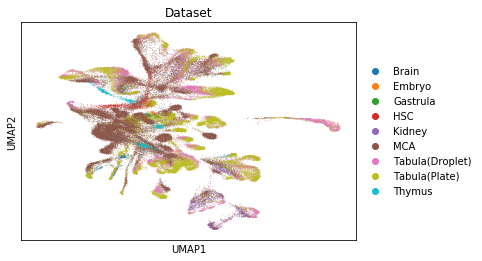

In [3]:
sc.pl.umap(adata,color='Dataset')

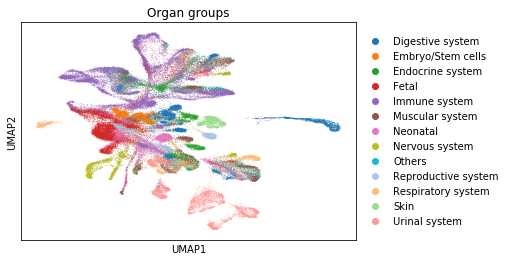

In [4]:
sc.pl.umap(adata,color='Organ groups')

In [9]:
adata_subset = sc.pp.subsample(adata, n_obs=50000, copy = True)

In [24]:
%%time
adata.obs["batch"] = adata.obs["Dataset"]
model = tnn.TNN(k=100, distance='pn', batch_size=32, n_epochs_without_progress = 10, verbose = 2)
model.fit(X = adata, Y=None)
embeddings = model.transform(X = adata)

[[0.         0.03135889 0.         0.         0.0159204  0.4159204
  0.00497512 0.06368159 0.57114428]
 [0.         0.         0.88377193 0.         0.00348432 0.06968641
  0.         0.06968641 0.10452962]
 [0.         0.         0.         0.         0.         0.71710526
  0.0504386  0.         0.01096491]
 [0.         0.         0.         0.         0.12037787 0.60035149
  0.38137083 0.41546573 0.55746924]
 [0.         0.         0.         0.         0.         0.92577598
  0.17246964 0.71093117 0.61160594]
 [0.         0.         0.         0.         0.         0.
  0.44504995 0.48073133 0.21833253]
 [0.         0.         0.         0.         0.         0.
  0.         0.26793824 0.24023615]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.92380118]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
47608
******Batches:[Brain, Embryo, Gastrula, HSC, Kidney, MCA, Thymus, Tabula(Droplet), Tabula(

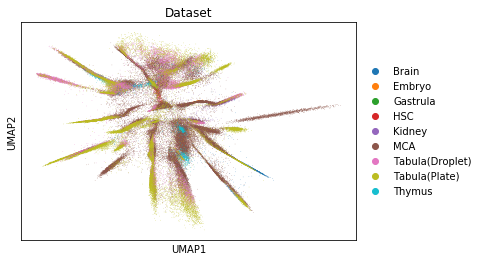

In [25]:
adata.obsm["X_umap"] = embeddings
sc.pl.umap(adata,color='Dataset')

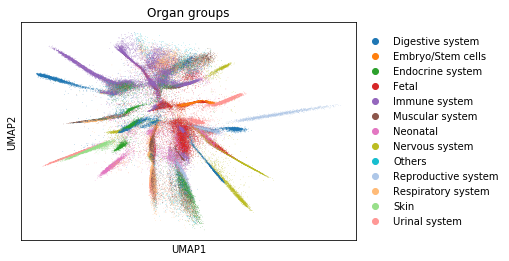

In [29]:
sc.pl.umap(adata,color='Organ groups')

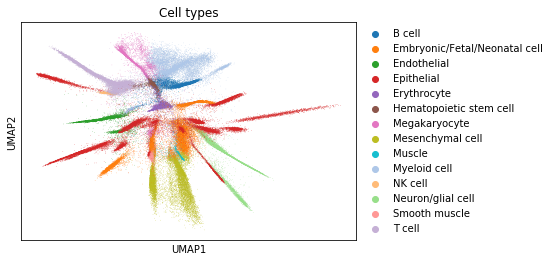

In [27]:
sc.pl.umap(adata, color='Cell types')

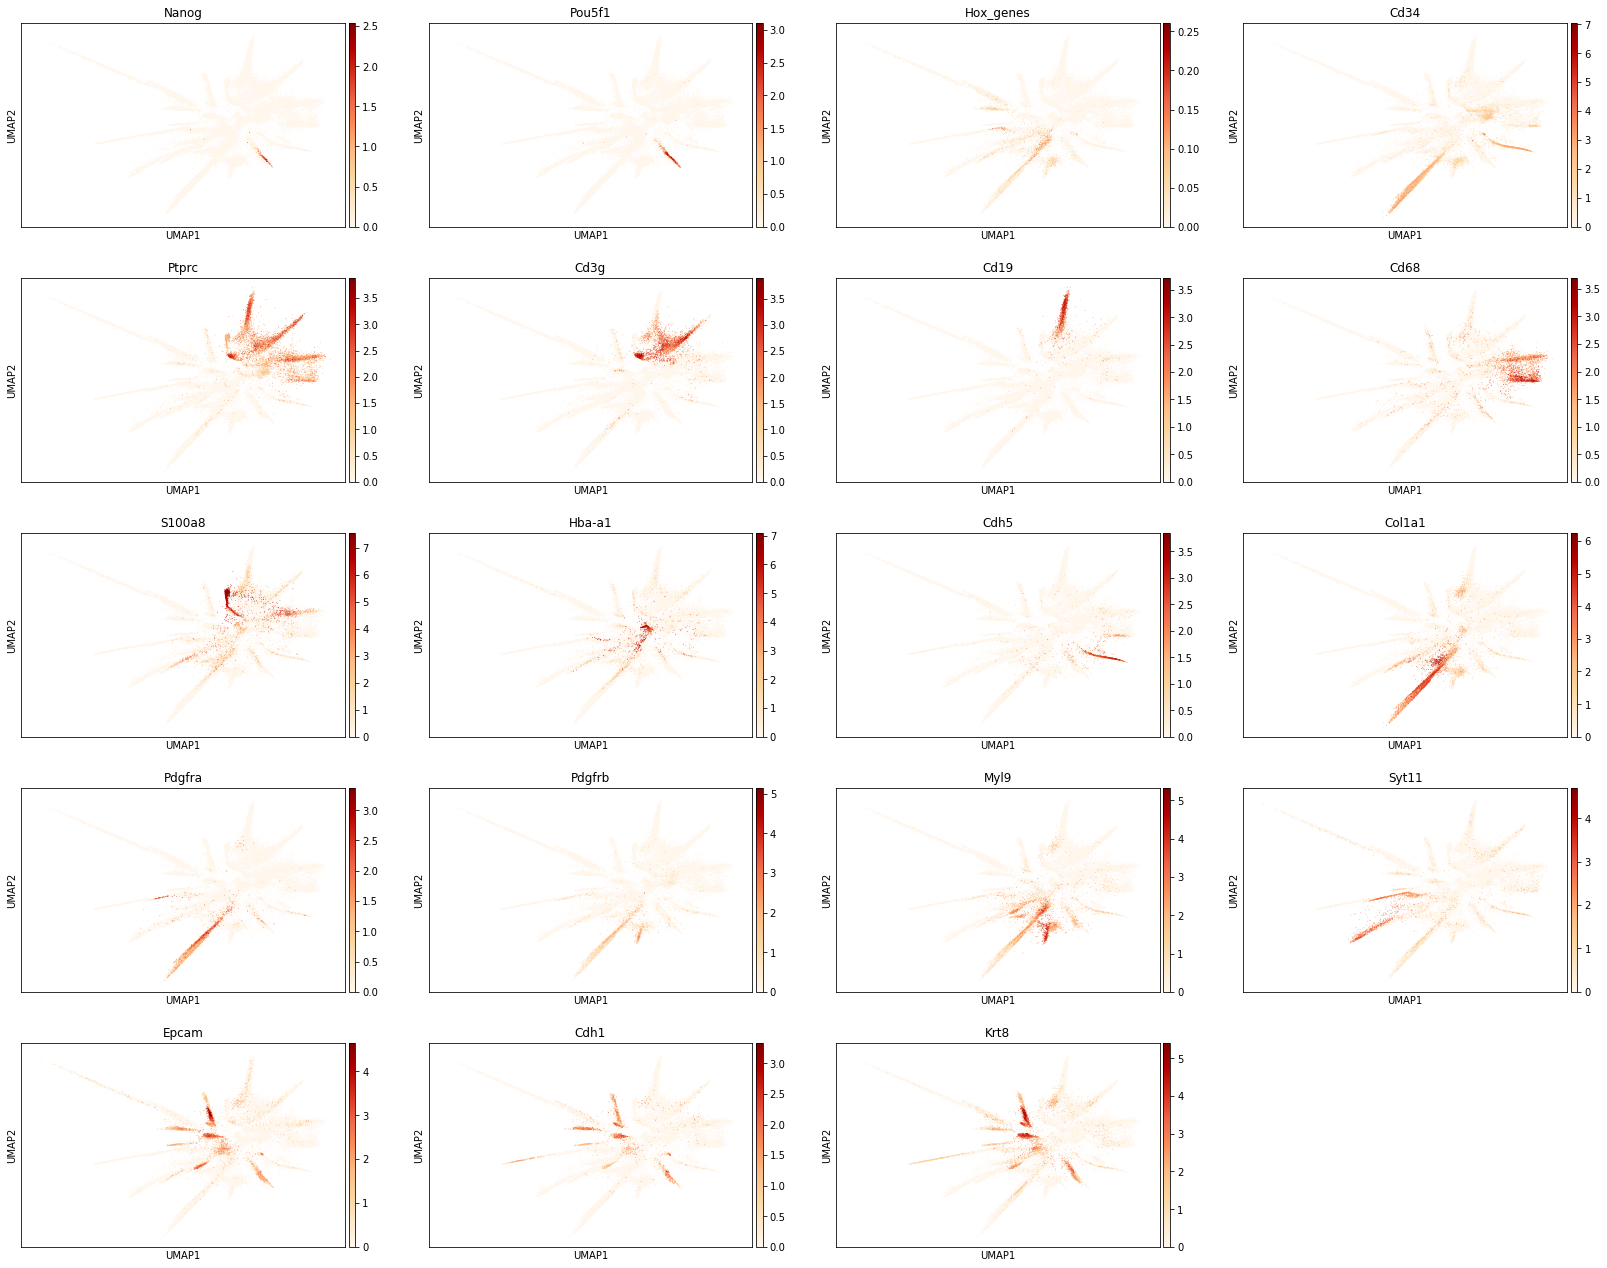

In [28]:
genes = ["Nanog","Pou5f1","Hox_genes","Cd34","Ptprc","Cd3g","Cd19","Cd68","S100a8","Hba-a1","Cdh5","Col1a1","Pdgfra","Pdgfrb","Myl9","Syt11","Epcam","Cdh1","Krt8"]
sc.pl.umap(adata_subset,color=genes,color_map='OrRd')